In [1]:
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import gi

gi.require_version("Gst", "1.0")
from gi.repository import Gst, GObject

In [4]:
Gst.init(None)

[]

In [68]:
pipeline = Gst.parse_launch('filesrc location=video.mp4 ! decodebin ! audioconvert ! filesink location=asd.wav')
pipeline.set_state(Gst.State.PLAYING)

<enum GST_STATE_CHANGE_ASYNC of type Gst.StateChangeReturn>

In [69]:
pipeline.set_state(Gst.State.NULL)

<enum GST_STATE_CHANGE_SUCCESS of type Gst.StateChangeReturn>

In [65]:
def new_sample(sink):
    print("try to pull sample")
    sample = sink.emit('pull-sample')
    print(sample)
    buf = sample.get_buffer()
    data = buf.extract_dup(0, buf.get_size())
    arr = np.frombuffer(data, dtype=np.int16)
    print(arr)
    return arr

In [66]:
pipeline = Gst.parse_launch('filesrc location=video.mp4 ! decodebin ! audioconvert ! appsink name=sink')

appsink = pipeline.get_by_name('sink')
appsink.set_property('emit-signals', True)


pipeline.set_state(Gst.State.PLAYING)


samples = []
data = None
# while True:
#     sample = appsink.emit("pull-sample")
#     if sample:
#         samples.append(new_sample(appsink))
#         if len(samples) == 256:
#             break
        

appsink.connect('new-sample', new_sample)

pipeline.set_state(Gst.State.NULL)


# # Create spectrogram
# fs = 44100
# nfft = 1024
# window = np.hamming(nfft)
# noverlap = nfft // 2

# f, t, Sxx, _ = plt.specgram(arr, NFFT=nfft, Fs=fs, window=window, noverlap=noverlap)
# plt.show()

<enum GST_STATE_CHANGE_SUCCESS of type Gst.StateChangeReturn>

In [60]:
data = [item for sublist in samples for item in sublist]

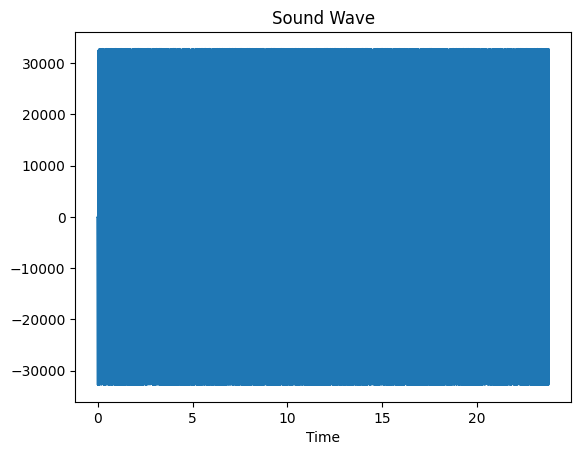

In [61]:
time = np.linspace(
    0, # start
    len(data) / 44100,
    num = len(data)
)

# using matplotlib to plot
# creates a new figure
plt.figure(1)

# title of the plot
plt.title("Sound Wave")

# label of x-axis
plt.xlabel("Time")

# actual plotting
plt.plot(time, data)

# shows the plot
# in new window
plt.show()

In [62]:
import numpy as np
from scipy.io.wavfile import write
# 32767
rate = 44100
scaled = np.int16(data / np.max(np.abs(data)) * 16000)
write('test.wav', rate, scaled)


In [134]:
pipeline = Gst.Pipeline()

In [135]:
filesrc = Gst.ElementFactory.make("filesrc", "filesrc")
filesrc.set_property("location", "video.mp4")

In [136]:
decodebin = Gst.ElementFactory.make("decodebin", "decodebin")

In [137]:
audioconvert = Gst.ElementFactory.make("audioconvert", "audioconvert")

In [138]:
audioresample = Gst.ElementFactory.make("audioresample", "audioresample")

In [139]:
appsink = Gst.ElementFactory.make("appsink", "appsink")
appsink.set_property("emit-signals", True)
appsink.set_property("max-buffers", 1)
appsink.set_property("drop", True)

In [140]:
pipeline.add(filesrc)
pipeline.add(decodebin)
pipeline.add(audioconvert)
pipeline.add(audioresample)
pipeline.add(appsink)

True

In [141]:
filesrc.link(decodebin)
decodebin.connect(
    "pad-added", lambda dbin, pad: pad.link(audioconvert.get_static_pad("sink"))
)
audioconvert.link(audioresample)
audioresample.link(appsink)

True

In [142]:
pipeline.set_state(Gst.State.PLAYING)

<enum GST_STATE_CHANGE_ASYNC of type Gst.StateChangeReturn>

In [159]:
np.ndarray(shape=(buf.get_size(),),
                      buffer=np.array(buf.extract_dup(0, buf.get_size()),dtype=np.float32),
                      dtype=np.float32)

ValueError: could not convert string to float: b'\xac)\xcd\xbbb\x8f\x94\xbbT\x1d\xab\xba\x18\xe9\x149`\x0e\x88:\xe4P\x17;t\x0fG;\x88\x82);\x08\xe8\x93\xb9t\xcct\xbb\x9a\x80\x0f\xbb\xb3\x0c[;\x1a\xab\xab;7\xe1\x10;Mm~\xba\xa4\x7fv\xbb\xa9j\x12\xbc\xe0mz\xbci\xf8\x90\xbcp#g\xbc\xcf\xe8\x18\xbc\x8f#\x11\xbc\xba\xd55\xbc\x05](\xbc\x11"\x9d\xbb\xef\xb9\xc3:"\xb0\xc0;\xb9\x84(<\xc8\xfb\x82<}\x0f\xa3<\xf8\x86\x98<\xda\x12I<~\xc1\xb7;\xc3\xfc\x95;\xea\xb8\xf0;\xe7H\xd8;\xdf#4;\xb0\xf1\xc09`&\x1b\xbb\x19\\\xea\xbb*/@\xbcXx~\xbc\xd1\x87\x88\xbcZ\xa9]\xbc0~8\xbc\xdc\xceF\xbc6\x0cD\xbc\xb9\x934\xbc\xbbu\x1a\xbc\xcc\xbbY\xbb\xce\x12\x82;\xf6|\x11<\x1f6\x86< H\xc4<S\xd1\xb6<>\x15|<P?h<~\xe1\x9f<|\xe7\xb5<Q6v<c\xf5\xc9;\xc9\x13\xaf;\x86=\xcd\xb9\xc0S\x94\xbc&\xef\xbc\xbc0R$\xbc\xa0\x9e\xf3\xb8L\x8e \xbbx\xc6\xaa\xbb\xad\xfa\x07\xbb\x14\x17\x929\x80\xbb\x12\xb8\x12\xa7\xcb\xba\x9dD#\xbb8\xb4\x87:\xa8\x97\xea;\xa6V9<(9-<}\xd7\xc7;\r\x94\xf9;\xae\x83l<\x8b\xf5><\xe0\xdf\x11;\x06\xcd\x03;\x8cf\xef;\xf9p\x99;\xa1h\x87\xbbcn\xe2\xbb<B\xf5:\x15\'3<\x96"\xab;r)\xb4\xbb\xa8\x89\x82\xba\xd8\xb1\x19<\xac\xd6x;r\xfck\xbc8K\xaa\xbc\x18C\x12:\x16\x92\xaa<d\xf4::\x9d\x88\xcd\xbc\x8f\xca\xeb\xbb\xe8rp<\x8d\x96\x07\xbbh\xe3\xa7\xbc\xc0E\x0c\xbc \xc5H<\x19\\T<mA\x11\xbbP\x87%:BI\x95<\xd6#?<\xf0\xb0\xf29:$h<"}w<T\x8e\x9e\xba\x00m\xce:\xac\xc3\xe3\xba\x8a\x9d\xd9\xbc\xb2 \xfa\xbcI\xa7H\xbc\x00\xe5&\xbb3p\xd0\xbb\x04:x\xbc\xde\xe8\x04\xbcqnL<\x82\x9aO<\xe8m\xa6;d,\x94<\xf6\xf5\xfa<~Y\x05=\x94\xd8\xf3<\x15\xcb1<bx\xd4\xbb#\x82V:\x9d\'`<\xab\xd8z<\xd2\x90\x8a;.u2\xbc<\x0e\xea\xbb\xc4l\x8f;\xb0\x87(\xbb\xd1\xf8N\xbc\x89\nX\xbc\xed\xbd\x05\xbc\xcez\xeb;#\x8a\x86<v0:<z\xa3t</H\x99<zs\x1f<,\x9fg;\x96\x95\x05\xbc\xc6\x15|\xbc6\x8f?<\xd4\x99\xbc<\x12\xe9\'\xbc\xea\xebB\xbc-\xa0\xa7<\x162\x1f<]\xc4\xd4\xbc\xf12\x01\xbd6\xbd\x90\xbc\xce\x15j\xbc\xf1\xb0\x1d\xbd\x16\t\x82\xbd\xacG\x07\xbdF\xf2\xb5<!(\xb0<\xaev\xf1\xbb\x90\xdf\x80;L\xea\x92<3E*\xbc\xe5m\x07\xbd\x17g\x97\xbcY\x9c\xbb;\x05\x06\xd8<\xcf\xdc\x10=&\x86b<Yn\xdd\xbc\x95E%\xbd\xd5\x0e\x96\xbb\x1a\xa9\x9f<\xb3S\xa8\xbc\xd5\xa2q\xbd\xb1n\xa4\xbc\xf8\xdf\r=\xc1\xff\x8c\xbc\xda\t\xc7\xbd\x03\x87\r<\xc8\xf0\x16>#|\x99<I\xde\xe9\xbd<\xfe-=\xb7$&>\xc9\xf7B=fu&\xbdq\xe7q\xbc\x10!b\xbc\xaa\x1a\xa1\xbd\x9f\x8a\xc8\xbd=\x84\xb0<\xd0\xdd\x0f>\x1b>\xff=9\x11\x83=\x06ku<b\x1b\xbd;\x03\xfc\x98=\xd0\x7f\x9c=S.\xe1\xbc\x83f\x1b\xbd\x88\xaf\xf3<-\x9c"<\xc7a\x90\xbd@<\xf7\xbd\xb55\xb5\xbd\x1a_\x87<c\x91\x04=\xaaY\xc4\xbd\xe2\xb5\x19\xbeX:K\xbd\x9a\xc8@<\x9fH(\xbc\xf9x\x0e=\x82\x8a\x01>\x98\xf4\xdf=\xd2\xdd\xf7;\x95\xca\xdc\xbc\xa0\xdc{\xba\x07i\xd7\xbc\xb6Se\xbd\xac\xdcc\xbb\n\xf6\xc8<\x0bu\x10\xbd\xfe\xac\xd9\xbc\x96\x12\xac=\x9d\x95\xcf=\xc0Z\xd29k*\x92\xbc?@\x95=\xccC\xb3=\x90\xb1\x0f\xbb\xc8\xad*\xbd\x16\x05\xc5\xbc;Y\xa3\xbd\x99\x16"\xbe\x9a\x07\xed\xbd\xa4\x81\x0e\xbd\xe5y\x82\xbd\x7f\xd1\x07\xbeZ\xf3\xf1\xbd\xdc\xdfP\xbd\xb4\x03\xdf\xbc\xfb\x9b\t\xbdmO\x0b=e\x8f\x08>\xd9\xd6\xe2=\xf5\x89.<5\n\x9d\xbc3-\x0f=\x1a\xad\x08>#TG>\x1b\xd9\r>\xe3\n\x9c=u\xa0\xdc=\xf4g\xe3=\xb6\x0e\x08=\xa0=\xb4\xbb\xc8\\\xe5<L\x1ef=)9\x8f<\xbcZ\xa3\xbd\x07\xf4\xf3\xbd\x94XT\xbd\xf6\x7f$\xbd\xfa\x86\x07\xbeq\x1b\x0e\xbe\n+`\xbdx\xe61\xbd."%\xbd!\xa2\x1f=\x8b\x97\x89=Dl+=\x03\xf4\xa1=\x04?\xc9=rD&=]Z\xa8<V\xfc\xf2<\xc72u<rn_=\x7f\xf0\x9e=4\xb1/\xbd\xbbT\x03\xbez\xa3e\xbd\xf6\xf0\x13\xbdYv\xe6\xbd\x98\xab\xd2\xbd\xb0\x0ej\xbd \xeb\xb8\xbdZ\x9f\xbb\xbd\xc4-\xa3\xbc0\xae\x1b<"\xdb\x80\xbb\xecd\x87;F1\xfd<\x0c\xbc\x86=\x8b\x05\x94=$\xf2\xdf<\xf6\xd9U<J,\x7f=\xdb\x08\x98=kk\xa4<\x17\x91\x85\xbb\x95]\xaf<i\xfd\r<\x8c\x1a*\xbdj)@\xbd\x8f\xa69\xbd$n\xd7\xbd\xd11\x15\xbe\xa2\x9e\xe8\xbda]\xad\xbd\xcd\x92\xad\xbdn\xcf\x9c\xbdf,\x86\xbd\x15u=\xbdx[;\xbc\x16q\xd9\xba\xdc!\xc5<\x80w\x15>\x16^\x8c>2\xbc\x99>\x96\\\x94>\xd4\xe4\x91>\xf22{>\xcdo\\>b\x96a>\x1f\xd6@>\x9b\xed\n>\x82\x19\xed=\xeby~=2\x109\xbd\xf2`\xfa\xbd\xf5\x9e5\xbe\xa8jw\xbe\xf9\xdct\xbe\x12\xe81\xbe\xfa\xc5#\xbeh\xbe;\xbe\xfaW\x1f\xbe*\xaf\xed\xbd\xff\\\xdb\xbd\x89X\x7f\xbd\x8a\xb0\xc7<\xdf\x9a\x96=\xf2K\xad=Pi\xdc=(\x0c\x12>\xb3\x1a8>\xd3\xf6J>\xfc\x0f+>\xf0\xa6\x1b>\xcb\xaeb>:\xa3\x81>\xfa]\x08><Q\xa8;\xc9z\xd3<4\xf3\xbe=\xb8\nI=hcj\xbd\n\xb8\xa1\xbd&\xb7.\xbd\xfb\xd9\xd8\xbd\xb5\xcek\xbe$\xb1]\xbe\xc8\x1d\xd7\xbd\xf75\xc8\xbd\x1c\xa5 \xbeu\xde\x13\xbe\x11I\xc1\xbd]^B\xbd \x93\x0b\xbb\x18>\xbe\xbc\xd3\xf0\x91\xbd\x99\xc7\xb2\xbc\xa7\xae\x8d=p|\xe1=\xe4\xf5\x00>(\x1di=\x03f\xd6\xbd\x19\x97\r\xbebf\x12\xbd\xcb+\x8f\xbd\xed\xf8A\xbe\xe5\t\xf4\xbd\xbe\x06\xf8<\x87\xbe\x15\xbc\x10>"\xbe\xee\xb0R\xbe\xf60\r\xbeB\xfbl\xbd~\x02\xdf\xbc\xf6N\xec\xbb`\xb3\x85=&\xea\xeb=\xd0\xc7\xde<\x80\xa9\xd7\xbdV\xd1\xc4\xbdn\x8a$=\x90\xa8\x11>\xe9\x8a\x13>D\x0b\xce=\xf9\x18^=\x82p/\xbc\x0c\xe5\xbb\xbd\xae\x08\x06\xbe\xb8O\xc9\xbd\x99\x101\xbd\x10o\x95\xbc\\=\x18\xbd\x80D\xe4\xbdW\x9dY\xbe&\xc3r\xbe\xf3\xe0\x0b\xbe\xa8*\x85\xbb:\x00\x84=h\xb8\x97=p\xb4_=j\x7f\xe2<\x80Z\x19=_\xac\xc0="\xb8\x1d>vyI>t\x17V>\xb7Q\x15>G\xf1\xa5<\xbc\x90\x9b\xbdl+\xcb\xbd\xea\x83\xa5\xbd,HX\xbd\xabq\x12\xbd\x10\x867\xbd\x11\xe8\xb6\xbd\xd9\x061\xbe\xb1\xbfe\xbe\xa5\xba\x04\xbe\xa2AN=\x10\xc9\xef=j \x8a=5\xbfy=n\xeb\xbe=\xb3k\xa0="\x87\xb8=qiC>Y\x87\x8f>\xe6\xee\x95>u_\x84>HhF>\x93\xd3\r>qx\xfc=q\xea\xbd=\xb6\xe8\x9b=a\x8e\x1b>\xf8A\x13>\x9e\xca\xd9\xbdW(\x9d\xbe\x1e\xc9S\xbe\xf6\x0e\x92\xbd\xe1U\xe4\xbd\xb9\xfd\x01\xbeD\xcf=\xbd\xfe\xe8\x90\xbd\xc8qQ\xbe\xf2\xaey\xbe\x80 \x06\xbe\xb2\xb9\x17<\x93:\x8a=W7\xaa=\xf0\x19\x10>oj\x1c>\xc6\x02\x0e=S\xf05\xbc\xbd\xc4\x0f>\x87\xbab>\xfa\x9d\xd1=7`0=b\x0c\xd3=\xdd\x95p=\xfc\xf3`\xbd\xd9\x97U\xbd\x94h\x9e\xbc\xa5L\xbb\xbdZq+\xbe\xb3\x8b\r\xbe\xec\x1a\x8b\xbd\r H\xbd\x0bS\x96\xbd\xbd\xd4\x9c\xbdL\xbcH\xbdg\x8eD\xbd\xa9\xd3\x88\xbdp\xcb\xc3\xbc8\x95\x8a=\x1e5\xe2=\x80$\xde=\xc3\xa6\xee=D\x97\xc2=\x8a\xd1\x14=L\xbf\xe9<\x88\x85k=Zj\x0e=\x95\xde\xe1\xbb\'\xc2\x99\xbc\xaa*6\xbd!\xdd\x99\xbd\xc0-C\xbd3G^<\x96\xaf\xf8<\x94\xe8N\xbc\x06\xc8+\xbd@\xa3\';\x98\xabo=\xc9\xcae=O\xd9\x1d=\x8a\r\xe4<\xd4\xd6\xa0\xbb\xae\xbf\x9b\xbc\xfe\r\x02\xbc\xa1\xfbJ\xbdv\xe8\xd9\xbd#=\x9d\xbd\xe0\x9cc\xbc\xf0\xfb\x87\xbb]\x029\xbc\xa6|M\xbckH\x07\xbd%\x07\xd7\xbc\xd4a\x08=*\xddl=\x90\x93\xb0<\x80Q\x97;\x90\x99\x18;\xfd\xe2\x02\xbd\xd8\x8d\x04\xbd2\x8e\xfe<D\xaa\\=\xd0\xe4Z<\xe0\xef\x9b;\xa0\xea\xcf<\x10\xcd\x03;\xd2\xbf"\xbd\xfb\x9f\x1e\xbdp6\x9a\xba\x0c\x830=\xa6zr=\xe1\xfc\xbb<\x99\xe2z\xbc\x00t\xae\xbb\xf8*7<\x8c\xe0K<I\x11\t=||+=@\xbb\xdb\xba\xc3\x9c6\xbd\x00\x87}\xbd\xfcn\xa4\xbdw\xed\xa2\xbd\xed\x18\x80\xbd[u\x9b\xbd\xd4\x86\xc5\xbd]\xaa\xb8\xbd\xe7\x9b\xa0\xbd\xad\xf4E\xbd\xd0\x06\x8d\xba\xf7\x1a\xb0\xbb\xac\xa9\x07\xbd;Kh<\x00-\x9c=\xc4\xebA=R\xee`<(,\x8a=\x1f\xe9\xea=\xdf\xa1\xbe=x\xce\xaa=\xe5\x1f\xb9=\'\xac\x0e=\x98^)\xbd\xc7_v\xbd\x93\xe9\x8f\xbd\x17\xe3\xe8\xbd\xe6\xa2\x0e\xbe\xa56\x05\xbe\xe0\x04\xef\xbd4L\xd2\xbd\x030\xac\xbd\xc2\xd3z\xbd\x04\xc8\xff\xbc\xc1\x19\x96\xbb\xa4\xc84<X\x0eV<\x94\x15";\x96O\x94<G\x15\x99=\xad\xab\xd6=\xd5\x91\xab=.\x0c\x91=][\x95=\x97\x8eg=L_\x1f=O)#=\x92]P=\x99\x85_=\xd4\x94\x9c<\nL\n\xbd\xa2\xf2\x17\xbd\xde<\x08\xbd\x19_\xbf\xbd\x84\xd6\xff\xbd7\xe1w\xbd^z\x12\xbd\x8c\xaf\xd9\xbdQS\xfe\xbd\x06&Z\xbd\x81:\xa6\xbc(\xa0\x16\xbd=\x85\x9c\xbc47\xa2<\xd6~!=\x08\x95g=\x90\x89\x89=\xb4y\x81=\xfeT\xa0=\x04\xcf\xcc=\xa1\xb2\xba=\xfe#\xc9=\xd2\x18\x11>8\x1c\t>\n:\x8a=b7.=\xe2X[=\xeaZ\xeb<\xd6\xb4,\xbc:\xa5\x18\xbd\x87\xd1\x8c\xbdS\\\xb5\xbd\xf6 \xdb\xbdr\x88\x19\xbe\xf3\xa6\x18\xbe\xcf\x9c\xbf\xbd\xbc\x98\xc6\xbdV\x84\n\xbe3K\xbf\xbd\xe6.\x04\xbdr\xf6\xc7\xbc"\x06\x83;\xa2\xdbn=\xc0?\x89=\x92BP=\x926#=tq\x9e<,\x163<0\xfbd<\xb8\xa0w\xbc\xeb\xccC\xbd\xa0\x9a\xe3\xbc|\xad\\\xbb!PA\xbd\x18?\xce\xbd\xdb\xca\x8c\xbd\xb2\xda\'\xbc\xb3\x90\x93\xbch\x81\xc8\xbc\x9c\x9d\xce<]@*=6\xf0H<\xb1Z\x00=!\x08\xb9=k\x1a\xff=T\n\x0e>j\xb9&>U\x8cO>\xc3\x9fO>\xe7\xaa\xf1=\xb2\xd4\x89=\x07\xe0\x11>\x82\x02;>6\xd2\xaf=`\n\x9b:\xfd\x0c0\xbc\xa4\x11\'\xbd9_\x8a\xbd\xaf\xc8"\xbd0\xf5\xc8\xbc\xfa\xdaW\xbd\x0c\xf3\x83\xbd\x13\xd8=\xbd\x01\x90\x13\xbd\x86\x8e\x18\xbd\x8f\xe5\x03\xbc8\x19\xaf=x\xb2:>>\x9e->\x07\xbb\xa2=\x7f\xe3Z=\x96\x87\xa4=\xe7\x16n=\xfc\xeb#=\xe9\xd9\xc4=\xd9c\xf4=\x1b\xb4#=\xa3X\x8d\xbc}\xb5\x92<\xf0\x06Z;^h\r\xbe\xd6mc\xbeE,\x15\xbet\xc5\xc5\xbd9\x1a\x04\xbe\x91\xa1\xa3\xbd\xe7\xf95\xbdp\x1a4\xbez\'p\xbel,\xa5\xbd\x06=)<\xe4\x00L\xbd\xa47\x91\xbd\xc8$\'\xbd\xe4\x00\x03\xbc\x1d4\x86=2Q\xda=\xde\x8f\x92=\x80\xe4m=\xae\xadf=\x80\xd1\xea<ZpD=: I=\xe9\xf0n\xbdZ\xc9\xe1\xbd\xa6\xb1e\xbd$\xff\xdf\xbd\xdbmy\xbe\xccc\x7f\xbel\x9cG\xbe\x82\x05T\xbe\xa6}R\xbeb\x9f%\xbeT\xb2\x0e\xbe\x1bn\xf4\xbd\x1ce\xbf\xbd\x05\xa1\xb7\xbd\xc6\xa9\x8c\xbd\xe61\xbf\xbc\xb8\x89\x0c\xbc\x18\x03\xc1\xbb\na\x81<\x14\xd7\xa9<{\x98\x9f<E\xe7\x0f=`\xe6\xd6;/\xcdJ\xbdH8x\xbc2\xdf\xa7=\x11\x93\x0b>\xaa_2>V\xfeL>\\\xef!>\x8dr\x10>b\xa8b>\x8cG\x86>\xb0\rY>\xf2\x93>>l\xf3M>p5X>\x9bIZ>\xa8\x82&>&1\x93=\xe1EM=w\xd2\xa3=\r\xa7\x88=\xf2\xe1\x17=\xb2/\xa8<;\x861\xbc\x1b\xc89\xbc\xd2:"=\xb1\xda<=\xfc\xce\x0e\xbc\xb1\xcd\x01\xbd\xf0N\xd3\xbcy\xe0y\xbd\xfe\x02\xde\xbd(K\xed\xbd\x0bU\x00\xbe\x8c\x074\xbe\xedZj\xbe\xb2T\x82\xbe\x1e\x88\x86\xbe>\x9c\x81\xbe.\x07h\xbe\x15vH\xbe\xe26\x1c\xbe\xd3\x99\xb8\xbd\x18\xa7\x11\xbdZS%\xbc:\xa4\xaf;b\xae+=\xbe\xe4\xce=D*\x19>\xb7R >E:\x05>w\x1c\xe0=$\x11\xe8=[\xcc\xec=?F\xce=\x91\xfd\xb9=\xef\x19\xb3=G\x91\xa1=\xbb\x9f\xa9=\xd7\x8a\xb8=\xfe\xd7\xab=\x97\x11\xf4=N\x98K>?+_>|t8>\x9b\x12C>\x1f\xf4c>B"M>]\xd7+>B\x12(>\xce\xe6\x14>\xc05\xc9=\xc4~]=\xa6|\xd9<\x88<\x16<\x10";\xbc\xe4\x82\x1a\xbd\xbaWg\xbdH\x03p\xbdbA\x17\xbd\xec_\xb1\xbbv\xb3^\xbc\x8c\x88v\xbdY\xe4\x98\xbdL\x9fW\xbd\xfc\x89\x7f\xbd\x8cc\xdd\xbdB\xd3\x10\xbeA\x9f\x1f\xbe\xd3\xfc/\xbeF\x93M\xbe"\x17t\xbe\x81\x7f\x82\xbe\xff\x95q\xbe\xa9\x1dU\xbed\xe87\xbe\xab\x95\x0f\xbe\xbb\xe3\xe7\xbd0,\xda\xbd\x94\xc8\xb0\xbd0\x89f\xbd\x98\x97S\xbd\x88\\\x90\xbd\x83\xee\xd3\xbd\xa7f\x1e\xbe\xdb:M\xben&f\xbez\xf5\x87\xbe\xee\x01\xb0\xbe\x1b\xad\xd2\xbeW\x93\xde\xbe\x82L\xe8\xbe\x0c#\xfc\xbe=\x85\xff\xbe\\\x17\xe5\xbe\x1e\xab\xbf\xbe(d\x94\xbeF{O\xbe\xef\x10#\xbe\x86\x96\x0c\xbe\xdes\x96\xbd\xe0\xc2\xf2\xba.Q\xf2<\x0b\x812=\\\xd7\x1d=XzB<\xd8\xaa\xd5;\x00\xa4\x8f\xb9\x9b\xe0C\xbd\x98_\x88\xbd,\n\xe2\xbc\xe4\xd7N\xbc\x94=\\\xbc\xf0\xf47=\x95\x03\xe6=F\x85\x02>j\x85)>\xd6N\x89>\x86\x81\xb1>\xe59\xbb>|\xf6\xca>\x99\xcf\xe6>\xe1\xd8\xe9>\x92\xea\xcc>"e\xb5>\xf6\xd6\xb7>\x1b\xca\xb6>\xe1\x08\x98>\xa0{u>\xf3\xf2\x80>\t\x89\x8b>\xc8Mk>\xb4\xf2:>\xcc\xa1^>\\\x0f\x9f>$D\xc1>e\x15\xc7>(\x8b\xc8>\xbcA\xd9>\x8b\xae\xe7>\xcb>\xda>\xder\xba>Z1\xa7>\x04O\xa4>\x92h\x93>3;J>\xf10\xd0=\xe4\x07G=\\\xaf(<\xa9b\'\xbd\x04`c\xbdP\x1a6\xba\xef\x1cI=\x13\xce\x1b=H\xf6\xf4<\\}t=\\\xe3\x88=vG9=\xae\xf94=ZBM=D\xd2\xe4<\x94\xda\xb1\xbc)^\xa2\xbd\xb1\xcb\xd9\xbd\xe4[\xd8\xbd\x14\xd9\x07\xbe\xac\x10.\xbe\x0c\xde\'\xbe\xe8\xe2\x1f\xbe\xba?8\xbe\x18w9\xbe\x10)\x18\xbe\x88\x86\xfe\xbd|\xcb\xd6\xbd\xac\x1b\x9e\xbdby\x7f\xbd8\xe8\x98\xbd\xc6\xda\xd5\xbd<\xf6\t\xbeK\x08"\xbe\x1bq9\xbe\xf8"R\xbe\xd9\xc1l\xbe0Z\x88\xbe||\x99\xbeZ\xdc\x9f\xbe\xeed\xa0\xbe\xcb\xc8\xa0\xbe\x04G\x94\xbe\xe4\xecg\xbe]\xe1)\xbe\xde\xb7\x12\xbem\xbf\t\xbe\x89 \xe9\xbd\x0cV\xc0\xbd\x9e!\x9a\xbd/3H\xbd\xb9\x84%\xbda\x0c\x82\xbd\xb8\t\xba\xbd\xa8U\xec\xbd!\x87\x1a\xbe\xd2\x14@\xbe\xda\xaeY\xbe6ba\xbej\xb0O\xbe\xce6;\xbe:#=\xbe>43\xbe\xccj\xfa\xbd3\x81}\xbd\xa6\xbe\xcc\xbc\x84c\x98;Q>\x0b=K\xe6Y=\xd4\t\x82=\x04Hk=\xa0\xf0\xde<p+\xc1\xbb$G\xf5\xbc"\x1e\x81\xbd\xe2\x80\xd5\xbd\x11n\x08\xbe\xac\xe1\x16\xbe\x82*\x15\xbe\x82\xb7\xf4\xbd\x12A\x92\xbd\x00,(\xbc\x1c\xbf<=\x0e\xd0\x9a=Ly\xc1=\xef\'\x07>\\\xa3+>\x84\xc85>\x14\x8b7>\xa2\xe4.>\x92\x8e\x08>Om\xc2=\x141\xa8=}\x8c\x8f=\x98\tM=\x06:8=pZ5=\x0cU\xe9<(R\xce<\xfcc\x7f=\xbb\x0fD\xbc\x0c\xb6\x1e\xbc\xe3p\xa3\xbbj\xc5\x9c\xba\xe7\x85\x00;h\x9a\xb7;\x11\x03\r<J \x07<\xdd\xdfk;\xc4lq\xba\x80P\xc4\xb7q8\x8c;\xb6\xcd\xaa;\xf0\x9dh\xb8d\xaa\xfe\xbb:\xd3D\xbc=\x8aM\xbcP\xa5j\xbci\xac\x83\xbc\x06\x179\xbc\xc2< \xbb/\xe3\xa2:\xd0\xc9\xe9\xba\x0fr\x94\xbb\n<\xab\xba\xc0\xc0\xb0;\x1c\xcb\x04<\x16\xf5\xd5;\x9aa\x02<\x0c\xf8K<\x16}E<\x9c{\xb2;\x98\xa7\xba9:\x04;;\x01! <\x94u@<J\x87\xb7;`\xeaM\xbao\x81\xd1\xbab\xd3?\xbb\x8c\x9a<\xbc\x8d\x81\xa8\xbcc\x02\x9c\xbc\x89T<\xbc\xa2\xd8&\xbc8)H\xbc\x8dX\x0b\xbc6\x16H\xbb\x7f\x95\xe0\xba\x0fW\xaa\xba\x99|\xac:\x85\xc8\xe1;\x92@^<\xda+|<7C^<\xe0\xfdk<G\x14z<Yve<c\xbeM< \xc9\xb7;\x8e\xfc6\xbbN\xd6@:g\xec\x91;\x0e\x97\xb6\xbb4\x98\x11\xbcP{\xae9/0\x82;\xe6W\xd0\xba\xab\x93\xbd\xbb\x9c\xb0\xce\xbb@\x12\xa3\xbb\xc2\x97\xac:\x1e\x0b\xf8;y"\x8e;1|Z\xbb\xd84\x9d\xbb\xf8\xae69M\x86z;Zw\xf7:\xf8\xd4\x7f:dY\xee;j+h<\xbf\xdeA<\xa1\xe8\x8c;\xac\xf2\xa6;\xc6\xa52<\x1dT\x03<\xdc_H;X@\xb4;\xe2`\n<\xa4\xca\xcd;]\x1a\x81\xbb\xc5\x1eW\xbcp\xb2\xa5\xba5\x07P<X\xa6p\xbb:8\xb1\xbcB\xd5\xa4\xbb\x1f7\x8b<\x8b\x87\xfb;uD\x95\xbc1U\xb8\xbc\x88\x11T;\'a\xa4<\xe4]\x92;\xa3y\x8d\xbb>1X<\xd6\xb5\x85<F\x1ev\xba\xc0\x9c\x90\xbb,\x1f&;\x16Y\xda;0"X<\x9d\x8c\r<\xb4\x01#\xbc\xa4\xa6\x11\xbcb\xc3J<\xa0\x0b\x10<\xf3\x97\xb7\xbcJ\\\x10\xbd\x13\xe3\xbb\xbcF}\xae\xbc\x1a\xad\t\xbd4\xe2\xdd\xbcz\x00(<\xd4\xe7I=\xde\xa1V=\x14m\x96<kAq\xbc\xc2gC\xbc\t\xbb\x88<P\xbb\xb6<\x1ef\xdc\xbb\xe9\xc4P\xbcO\xed\xc2<&|\x05=b\xb2]\xbc\xbb 0\xbdL+\xb3\xbc\x00 G\xb62\xb7\xdf\xbb\xf6F\xbe\xbc\xba\x8d\xa8\xbc\xaa\xde:<u\x84\xe0<\x8a\xd8\xc6\xbb\xac\xe3\xdd\xbc\xc8f\xd0\xba\xaa\xa0\x12<p\xdd+\xbcP[\x97\xbcC\x11\t\xbc}*\xa8<\x1b\x1e\\=\xa1~4=hz\x0b<\xc7u\xac;\xd5\xde\x89<J\x1c\x98;\x0ek\x97\xbc\xdcp\xed\xbcD\\\x93\xbbe\xe3?=\xd0\n}=\x05\x92\xd7<\xb8\xa2c;\xe8\xbe{<\x9c\x0c\x98<g\x8dh\xbc\x18\x88\x02\xbd\xe8>\x8c<\x83iF=u\xd1Y\xbc\\\x98x\xbd>\x12\xbf\xbc\x0c\xcf\xb5;\xe6\xf7\x81\xbcv\x7f\xf7\xbc\xe6\xc2T\xbc\xaf\x01\xfd;\xacq%\xb9q]\xa0\xbcW\x8d9\xbb\xa2\x04\xb9<\x8dM\xc8\xbb\xf3~\xf8\xbc\xef\xf3\xe1;\xc8\xf6$\xbc\xa6q\x86\xbd\xe143=\x1e\xa3/>y\x80*=\xc1\xcf\xd0\xbd\xd6\r\x84\xbc\x95\x8c =~\xc9q\xbd\xfa\x1f\xb2\xbd\xa0\xa2\\\xbcv\xa9s\xbc&3\x96\xbd\x02z\x19\xbc\xbby\x05>\x10\x01\x07>\x00\x91\xcd<\x8a7\x14\xbd\xac\x90N\xbdjy7\xbd"?;\xbd\x8ee{\xbd\x9f=*\xbc[ y=^\xa2\xe8<\xcf\xab\x1a\xbdG\x99s\xbd8\x17d\xbd`\xf6\xff:d\x1e\x91=E\x01<=\xde\x07\xeb\xbcV\x81\x18\xbdm]\xc9<\xaa!==\xd40\x88\xbc\x887\xbc\xbc\x10\xf7k=\xbcuQ<\xdb\xca\x1a\xbe\x8b\xd7%\xbe\x05\xfe\xae\xbc\xd8\x9d!=\x11H\xab<\x8eHJ=\x14\x1c\x90=\x993R<5\xa9\x0e\xbc\xd6)z=?\x90\x93=\x14\xfe\xee;\x8c\xd37=\xcc\x00$>\x9d\x9b+>7)\x96=8\x93\xea:\xdc\x18\xa5\xbc\xf2*`\xbd\xda\x1a\xfd\xbd\x1e\x89\x02\xbe\x16\x9e\x1c\xbd\xe0\xb7\x05\xbc2\xa9\x8b\xbd\xa8\xf8\xc0\xbd\xb9\xa4\xe5\xbd\xf2\xdd+\xbeW\x0f\x08\xbe`\xa5\x95\xbbL\x89\r= ZD\xbb\\\xf2\xfa<\x0e\xd7\xc7=\xacb\x01>FS\x1b>\xebr\x18>\xe0`\xe5=P\x93\xf1=d\xed\x03>r[\xaf=\x98qd=\xe7%a=D\xaf1=\x7f\x18\xd3<jGV\xbd7\xf3E\xbe\xfcH]\xbe\x81w\xb8\xbd\xbee7\xbd\xb4\xc4\xe7\xbd<\x88\xb8\xbdL"6<$\x9e\xe0<@T\xae\xbb+\x88\x84\xbc\xeeh\x1f\xbd\x8a\x83\xd5\xbc\xa5\xaa>=\xbf?\x80="\xbb\xcb<\x84\xe1%=\x8a\xd7\x93=\xbc\xf6\x9d=\xf3\x17\xd2=\x16\xe3\xba=\xb7\x96\x88\xbb\xe8g0\xbd /\x81<\xc0\xb1\xf1\xbak\x18\xd4\xbd\tO\xdd\xbd\xfd\xebi\xbd\x17\x98\xe0\xbdOu\x1d\xbe\xd3t\x80\xbd\x84\x85 ;\xfc\xb0S\xbd\x0b\xbb\xaf\xbd6A+\xbd~\x80\x86<V4\x19=\xbb6\x8d;\xd7U\xb6;8\xd5\xcc=}:\x10>\xfe\xe3\x8f=V\xc6|=\xd1P\x05>o\xff\xe4=\xec\xbd$=\x0b~\x16=+R\xeb<H7`\xbd\x88H\xf6\xbd8\xcf\xf6\xbd\x80\xbb\xfb\xbd\xf7\xcb*\xbe(\xf6S\xbepD4\xbei)\xb6\xbdZ\xab#\xbd\xdd\x83\x0f\xbd\xdf;\xfc<0\x88\x1b>.\x1a;>\xe3P\xd6=%\xde\x99=\x95\x86\x14>\xa5yI>n\x1cM>\x9a\x19l>\x89\x18\x83>\xd7\xfbP>\xc3\xf1\xe5=\xe8\xa6\xc5<\xd4PQ\xbd\x8c\xf0\x8e\xbd\xa5\xdcf\xbd\xaa\x88\xb0\xbd\xac\x8f\xdd\xbdB\x82\x9a\xbdb\xf2\xa1\xbdxW\x03\xbe\xc2v\x13\xbe\xbcb%\xbe\xec#=\xbew?\xf6\xbd`y\xfa\xbcYf\xcd\xbc\xa4\xa5\xff\xbb\x9aV\xaf=\x9c\xea\n>3\xa4\xda=i\xf2\xb0=\xcaU\xd1=\xd2\xba\x1a>a\x14l>\x7fn\x8f>\xf8\xfa\x82>\x1c\xf0@>%\xd7\xe9=v\xad@=\xc0\xbf\xc5\xbbtz\x12\xbd<)\xfa\xbc\xa2_\x04\xbd\xac\x05\xd2\xbd\xf2X<\xbeGLD\xbe\x9aRE\xbe\xd3?}\xbe\x83\x82\x83\xbe\xa2\xf0,\xbe\xb4\xc0\x89\xbd\x00\x94R\xb9\xb03\xa3<.\x99\xf6\xbc\xb0M\x81\xbd\xce\xdd\xcc<\n\xd8\x11>\xba\n;>\xf5\x03U>\x8a\x1d]>$\x92\xe9=\x00B\xb7\xb9\x00H\xd2\xb8\x80\x04>;\xfa\xc6z\xbd\x126\xa0\xbd62\x9b\xbdV\x90,\xbe\x807\x88\xbe|\x8d\x8d\xbe\xed\xd6\x87\xbe\x18Qc\xbe\x05\xb0\xd7\xbdx\xcbK\xbc\x1c\x87\x87<\xac%\x16=\xe05\xeb;\xe0>}\xbd\x0c\xc3\xb2\xbc\xb3\xd1\xee=\x1f+>>\xd6\xa7&>\xa2\xbb\x02>\xaex\xb8=\x18\xa5\x04=.\xf8,\xbd\x14>\xbd\xbd\xd3Dl\xbd\x80zb;/\x13\x02\xbd\xd0\x04\x01\xbeey:\xbe"\x16d\xbe\xe4\x84u\xbe;\xb7#\xbe\xcc\xab\x18\xbd]M\xf3<UE\\=\xc3b/=\x02\x9aa\xbc\xf6\x01\xf5\xbcg\xd0j=\xbf\xd39>\xabN\x86>x\xc9\x80>1\xd7\x14>\x17\xe4B=\x97-\xa9<\xaf\xfe\xe2\xbc52\xc9\xbd\xc2\x92J\xbd\xa1\xb9\xa1=S3\xbc=j\x8f#\xbd\xfa\xe9N\xbe\x1cD\x94\xbe\x8e\x93e\xbe9,\x88\xbdX\xce\x1b<!+\x1d\xbc@\xf0\x90\xbc\x84g\xcb\xbc\xf1\x19+\xbd\xea\xb6\xd9\xbb$$F=\x88z\xdf=-{\x8a>\xc4\x00\xdc>W\xd0\xb4>\x0f\xed\x15>\x92\xbf\xad=\x08\xda\x12>\xb0\xb6?>\x86\x88g>\xf0\xaaU>B\x0c\x81=ol\x9e\xbd\xae\xf7\xec\xbd]e-\xbeB\x87\x82\xbe\x1e8m\xbe\x8c\x12\xfc\xbd\x14E\xc1\xbd6<-\xbed\x82^\xbeK\xca\x0f\xbe\xbe\xcf;<\xa9&\xdc=\xb0\x85\x05>\x8a\x95\'>\x8fQ;>\x05\\\x01>\x8e\x87\xb7=I\x82\x13>\xde\x14->\xdd\x19\xe6=\xce\x9d\xac=\x1d\xd7\x95=\x01\x0f\xf8\xbc\xbf\xce\x17\xbe+\x19\x0f\xbe\x13\x90\x90\xbd\xa10~\xbdT5\x94\xbd\x0eq\t\xbd@\xbb\x97\xba\xc5I\xf1\xbc(\x03\x8b\xbd\'\xf6\x87\xbd\x04n.\xbd<> \xbc>\xc8/=\x1c\xc2\xc8=\x80\xbe\xd6=[\xca\x1a=\xbc\x9e\x10\xbdme\xb8\xbc*\xfe\xc1<\xe0\xb9\xa2\xbb\x1c\x91E\xbdo\xf9i\xbb\xe4W}=\x8a\x10J=\xf2\x82X\xbc [3\xbd0.\x97;\xbb\xe9\xc5=\xf45\x06>:S\x94=\x8c@\x90;6\xc5\xb0;\x8f\x83\x0f=\xc0\x8d\xe2:\xd4\x8c\x9d\xbd\x18\xda\xe5\xbd\xd4\x0e\xf6\xbd\x03\x02\x19\xbe\xc4{\x13\xbe\xf8\xd6\xae\xbd:v`\xbd\x845b\xbd2.\xe3\xbc4\x9e\xf5;\n\xa8\xda<\x84\xb7j=\xeef\x9d=@\x8eS=x\x1d\x1d=\x8bs\x9a=l\x9e\xc5=\xe2v\x88=~\x0c\xfc<\xc0Wy\xbax\xd5\t\xbd\x8c\xc9\x18\xbdJ/=\xbd\xa0\x93\xed\xbd\x96\t&\xbed\xbc\xcb\xbd\xba\x1e\x04\xbd\xa3\xa0[\xbdc\xd1\x96\xbd\x16\xec\xf6\xbc@Q\x9b\xb9\x8c\x84$\xbc\xdc\x86\x00<\xf8dr=\x1a\xa0\xb8=\xeb`\xbb= \xba\xb7=j\xa5\xbd=\xac)\x9e=\xdd\x05\xe7<t\xe0\x81\xbcY\xae\xe3\xbc\xb0{Y\xbd0S\xc3\xbd\xdaE\xc1\xbd%N\xa1\xbd\xa7Z\xda\xbdX\xe9\xea\xbd|%D\xbd\x7fN\x0b=\xfc\xc2\xa3=Ek\xa9=\x9b\xcc6=\xd5F\xd1<4v\x97=$\xe6\xf1=A\x8f\xb9=\xeeew=\xf9\xc6\xb0=\xd4W\xbd=\xce\xbb\xd5<Y\x8e\xff\xbc\xdb\xd5\x03\xbd\xfb\xfc>\xbd\xf11\xba\xbd\xa2\x88\xd9\xbd\x1c`\xe2\xbd\nc\x11\xbe,\xbe\x14\xbe@\xb7\xb0\xbdc\x10\xea\xbcZF\x8d\xbc<\x1d\xca\xbc"]\xb9\xbc\x81e\xd2\xbc3Mb\xbd\x93O\xbf\xbd\x04\xb5\xd0\xbd{\x8d\x90\xbd\xa3\xcd\xcc\xbc@\x19Y\xbaH\x85\x17;\x1dK\x9b<@7+=\x9dLP=\xf9\x89\xbe=\xb0\xcc+>\xdc$9>]n\x14>\xab\x9c\x1b>\xec\xe9\x19>eK\x97=W\x12U<\xf2\xb7w<\xdb\n\x8a;\xa9\x8c\r\xbdy\x1d\x90\xbdA\xa7\xf5\xbd\xbdd(\xbe\x89\xcc(\xbe\xa6\x90 \xbe4\xde\'\xbe\x01\r\x19\xbe?$\xf6\xbd\xd1n\xca\xbd\x19\xbe>\xbd\x96\'!=\xbf\x10\xc1=\xc0\x82\xfb=\xd1\xfc6>r\xe7d>A\xcbL>IY)>\x8bd4>\x97\x9b)>$)\xa7=x\x11\x03\xbc|\xb6<\xbd\xc1\x80\x81\xbdcW\xb6\xbdO\x10\xea\xbd\xf5{\xfa\xbd\xfcn\xde\xbd\xddW\xce\xbdd\xfa\xde\xbd!\xfe\xaa\xbd<\xa2\xc8\xbc\x80a\x95\xb9\xd0z\x0c\xbb\x04&\x87<p]\xe6<\xe3\xcb\xe1<\x8e\xe1F=\x0bAq=\xef\x1a8=D\xdcw=\x90@\xab=\x9a\x91)=\xb6\xbf\x16\xbd\xf8j\x8b\xbd\xcb#T\xbd\x0c\xfdK\xbd\xc7&w\xbdE\x19\xeb\xbc\xe6y5;;\xc6\x18\xbd\x0c\xfb\x98\xbd\x0bbI\xbde\x18\x1b\xbd\x19\x00\x1d\xbdX\x95\'<:#\t=H\xf3\xc9\xbb\xd0\x91\xa4\xbc\x90\x8f\xd6\xbb\xae\xa9\xca\xbb\xa2\xad\xa8<\xc0R\x86=\xbf\xb6\x9f=\x87%\x80=N\x94\xc0<t\x16\x06\xbb\x04\xb7f=\x91[\x05>\xc5\xfa\xf7=\x06T\xdd=\xbcs\r>\xd0]\xd9=\x8ex\xe9<H\xf4\xc8<\x14>\x17=a\x92\x03\xbd\xbcX\xbf\xbd\x87\'\x9b\xbd,p\x8f\xbd\xbe\xf5\xed\xbd\x18w\r\xbe\xf2\xc7\xc7\xbd@D\xb9\xbc\xb6\xf3\xd8<\xaf\x12n<DF\xcb<Rn\xfb= \xb5M>\xec\xd5M>pr\\>K\xa4a>\xee\x7f\x0c>7\xda\xb9=\x90\xc3\x1d>\xa9\xd7\x04>\xa3\xcc\x15\xbd\xcd\xc5\xdf\xbdu\x13\x80\xbd{@\xde\xbd\x84\xa7D\xbe\x1f\\\x10\xbei\x05\xd1\xbds+H\xbe\x84\xd9U\xbe\x92\x10`\xbd\xd2\xbb\x98==3\xc8=2J\x97= \xcbV=3f\xe4=\xbf\x81b>,\xedZ>\xfa\x1b\xd2=\xdb`F=\x9c5\x12=w\xe9\xd8\xbc\x8a\xa6\xe7\xbdd\xe7G\xbeV\xd2\x7f\xbe\x8a;d\xbe\x814.\xbe\xa9\x1b6\xbe\t3.\xbe$U\xbc\xbd\x9a\x89K\xbd\xad\xf6\xa4\xbdz\xd8\xd0\xbd[i\xbd\xbd\x8fU\x92\xbd\\\x82%\xbd\x96\xef\x02\xbd.UW\xbd\xfd\x86F\xbd\x19\xc9\xac\xbcG7\x08\xbd\xdd\xfc\xb9\xbd\x98\n\x07\xbeZs\xde\xbdW\xc82\xbd!]\x81\xbc\x8a\x00T\xbd)\x85|\xbd\xc8l\xa9<\x8a\x02\xf1=\x83\x80 >\x87\xea2>.02>z\xa2\x00>6\x10\xd5=\x1a\x00\x12>\x025\x08>\xb4\x18Q=\xbc\xc1{\xbcFaZ\xbdcF\x98\xbd\xc6\xac\x83\xbd@\xba\x8f\xbd\x1d\xb4\xd0\xbd\x85\xc2\x94\xbd\xa2\xcd\xcf<+\x92\xda=Kf\x08>p_\xf4=\xd1h\xef=\xc6\xd25>\xae\x08t>\x91yP>\xb8\xc3\x01>\xd3c\xc8=\xd4{\x87=\xd7>\x06\xbd\xad\xfa\x02\xbe\xa2$\x18\xbe\x05\xb8"\xbe\xcb\x83a\xbe\x0e\xba\x87\xbe/)n\xbew\xa42\xbe\xca\x01\t\xbe\xbc#\xa3\xbd\xfeOQ\xbb\xc3\xf6\x81=\x1e\x9e\xe1=\xf6*\t>J%\xf6=\x8c\xb3\xbc=T.\xc5=J\xfd\xf2=\xd0C\xd7=<EY=\x00\xa1\xb9;\x90\x97h\xbcz2\xcd\xbc\x99\xe7X\xbd\xc0a\x91\xbdkX\x0f\xbdh\x9e\xea;\xf0V\xe4\xba\xc8Xm;\x85\xcb\x82=\x97]\xd8=\xff\n\x01>`\xd95>\x14zR>\xd8\x86,>\xec5\x05>\x18y\xe0=`\x18\xa8=\x8e\xb7|=\x91\x92\x07=6\xcc\xb3\xbcg\x14.\xbd\xd8\x8c\xaf\xbb\xcfl\xa0<\x9d\x8e\x83<[\x8f/=\xac\xcc\xd1=u\xeb\x06>\x87&\xec=\x0c,\xe1=\xb6\xc7\x06>2\x8c\xe6=\xfa\x93\x08=\x9c\x8b\x00\xbd\n\xc9b\xbd(\xa3\xbc\xbdg\t\x1e\xbep\xf0T\xbep\xe6y\xbeKs\x88\xbej\x0f\x8b\xbe\x9a\xaa\x85\xbe\x9d\xa3l\xbe\x80\xbd0\xbe\xe6\xc1\xb5\xbdhe\x8b;\x10\x08\x8f=Mv\xa3=\xd0\x9a\x95=\xd2\xeb\xc4=\xdb\xbd\xe1=MA\x91=\x08\x84G<r\xfa*\xbd^U\xef\xbd\x0feS\xbe:Z\x8c\xbe\x91k\xa5\xbe0\x04\xbd\xbe\xaax\xc7\xbeK\xee\xbd\xbe\xf0\xfe\xb6\xbe\ti\xbd\xbe\xdbl\xb3\xbe7\xe1\x8d\xbeldV\xbel:%\xbei/\xdc\xbd^\x81\xa1\xbd %\xb8\xbd\xb4m\xca\xbd@\x05\xc6\xbd\xe8c\xb3\xbdp!\x8d\xbdz\xca\xad\xbd\xa2\xd4\x08\xbe\x05\xd4\x0c\xbe\xa03\xf7\xbd(\xdb \xbegl5\xbe:\x96\xec\xbd\xc8\xddi\xbd\xe0\x00$\xbd}\xa3\xc0;\xb8p\x91=*\xec\xba=ht\xc7=*\x0f\x0e>\xf3\x9e<>\xf6SR>\xc11b>\xc0\x86m>\xb2\x91f>\x88\x16Y>\xdd\x01S>\xba\xa4P>S\x8dH>c\xdd7>\xe5\xab3>\xa7\xb4P>\xb5Pt>\xa0I|>\xea\xbb{>\x11\xf8\x89>\x95\x80\x9c>\xda\xf5\xa0>\xf2<\x90>\x10=x>\xdcsn>b\x1et>$\x7fc>\xbe\x90>>\x94j*>\xa9\xea1>\xddA3>\x89U >\xab\xf4\x1d>\x10\x83=>\x95=]>\xbcuq>\xf6\x17\x8e>n^\xab>i\x91\xae>^,\x92>\xe8\xd6s>B\xfaX>\x07\x8b">\xf2\x0b\xca=b\xe4\x90=V[)=\x88\xee5\xbc\xa8\x0bx\xbd\xf4e\xba\xbd\x8ee\xaf\xbd\x99~G\xbd\xb23\xc1\xbch\xc4\xe7\xbbB"\xcf<)\x15\x1b=\xd5B\xda<\n\x085=\x959\x9b=\x9c\xfd\x92=\xf2\xd44=\xb8\xe0R<\x90\xcc\x12\xbd\xa5\x07\xde\xbd#,@\xbeVxx\xbep\xda\x84\xbe\x0c\x9d\x86\xbe\xff\xb3\x8c\xbe*5\x93\xbe}\xce\x93\xbe\xa0\\\x89\xbeW9h\xbe\x82aB\xbe>\x88.\xbe\xed\xfc\x12\xbeP\x8c\xd0\xbd\x0f3\xad\xbd\x16 \xe2\xbdX\x12\x13\xbe<\xe5#\xbe\xcd%3\xbe\xa8jG\xbe\x98_`\xbe\xd0\xa1\x84\xbe\x07\x10\x97\xbeZ\xc1\x97\xbe\x8c\x02\x92\xbe"\xf7\x90\xbe\xd8M\x85\xbeG\x19V\xbe\x13<\'\xbe\x9as\x06\xbe\xb6J\xd0\xbd\xf35\x9c\xbdt\xb2`\xbd\x92\xbe.\xbd\x07ZQ\xbdTU\x87\xbd\xad\x82\x9d\xbdR\x81\xde\xbd\x16\x0b#\xbe\'\x9c;\xbe\xb8\xd55\xbe\xb6\xc47\xbe0\xaf;\xbeFE"\xbe;\x03\xe1\xbdy\xaby\xbd\xe4]\xdd\xbc\xe8@\'\xbcP\x9c\x19<\xf8\xb2?=\xb2\x80\xb5=\xef\x0e\xf9=\xda\xbe\x0b>}\xfd\xf2=\x1fJ\xac=Y\x11\x80=T\xf5.=$\x89\x86<\xc0\xec<<\xc6\xf1\xba<62\x8e<|0.<vd\xf6<uex=\x9eC\xc1=\xce\xe0\x11>\xeb\x8d?>\x86\xcbV>k&j>Eg\x80>'

In [143]:
data = None

In [144]:
while True:
    sample = appsink.emit("pull-sample")
    if sample:
        buf = sample.get_buffer()
        caps = sample.get_caps()
        if caps.get_structure(0).get_name() == "audio/x-raw":
            arr = np.ndarray(
                (caps.get_structure(0).get_value("channels"), ),
                buffer=buf.extract_dup(0, buf.get_size()),
                dtype=np.float32,
            )
            data = arr.T
            break

In [145]:
pipeline.set_state(Gst.State.PLAYING)

<enum GST_STATE_CHANGE_SUCCESS of type Gst.StateChangeReturn>

In [146]:
pipeline.set_state(Gst.State.NULL)

<enum GST_STATE_CHANGE_SUCCESS of type Gst.StateChangeReturn>

In [147]:
data

array([-0.00626107, -0.00453369], dtype=float32)